In [23]:
import pandas as pd
tracks = pd.read_csv("fma-rock-vs-hiphop.csv")
echonest = pd.read_json("echonest-metrics.json", precise_float=True)
echotracks = pd.merge(echonest, tracks[['track_id','genre_top']], on='track_id')
echotracks[echotracks.genre_top=="Hip-Hop"]

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
118,583,0.748986,0.765886,0.513173,9.572095e-01,0.614844,0.886914,180.025,0.401672,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [17]:
echo_corr = echotracks.corr()
echo_corr

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [19]:
features = echotracks.drop(["genre_top", "track_id"], axis=1)
genre = echotracks["genre_top"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_feature = scaler.fit_transform(features) 
scaled_train_feature

array([[-0.19121034,  1.30442004,  0.03831594, ...,  0.37303429,
         1.15397908,  0.46228696],
       [-0.30603598,  0.50188641,  0.78817624, ...,  2.44615517,
         0.00791367, -0.69081137],
       [-1.20481276,  1.68413943,  0.31285194, ...,  0.13513049,
        -0.77731688,  0.63107745],
       ...,
       [-1.29470431,  1.17682795,  0.13265633, ...,  0.85182206,
        -0.93541008, -0.07941825],
       [-1.13869115, -0.02253433,  0.57117905, ...,  1.40951543,
         1.31301348,  0.47513794],
       [-0.90611434,  1.10148973,  0.56322452, ...,  1.36030881,
        -1.43669053,  0.76217464]])

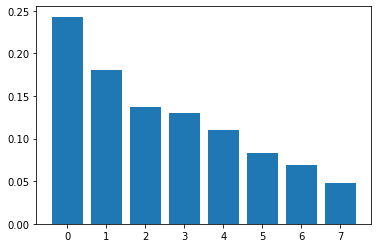

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_train_feature)
exp_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
plt.show()


[0.24297674 0.4234199  0.55992299 0.68986388 0.80042636 0.88344881
 0.95268664 1.        ]


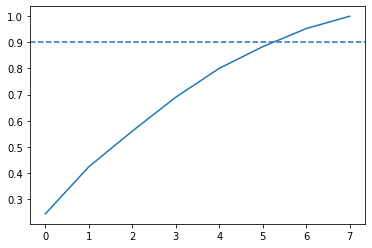

In [5]:
import numpy as np
cum_exp_var = np.cumsum(exp_variance)
print(cum_exp_var)
fig, ax = plt.subplots()
ax.plot(range(pca.n_components_), cum_exp_var)
ax.axhline(y=0.9, linestyle="--")
n_components = 6
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_feature)
pca_projection =  pca.transform(scaled_train_feature)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, genre, random_state=10)
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)
print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



In [12]:
hop_only = echotracks.loc[echotracks["genre_top"] == "Hip-Hop"]
rock_only = echotracks.loc[echotracks["genre_top"] == "Rock"].sample(len(hop_only), random_state=10)
rock_hop_bal = pd.concat([rock_only, hop_only])
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

In [13]:
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.74      0.73      0.74       230
        Rock       0.73      0.74      0.73       225

    accuracy                           0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455

